# Q2.1: Autoencoder on Iris (2D Representation)

Train an autoencoder on the Iris dataset and visualize the **2D latent representation**.

**Exam outputs:** latent space plot, reconstruction error (MSE), and loss vs epochs.

## Step 1: Import Libraries

In [2]:
# Install tensorflow if not already installed (this line should be executed first)
try:
    import tensorflow
except ImportError:
    print("TensorFlow not found. Installing now...")
    !pip install tensorflow
    print("TensorFlow installed. Please restart the runtime to ensure all imports work correctly.")

TensorFlow not found. Installing now...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 744.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 110.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 147.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 136.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.0/225.0 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 7.3 MB/s eta 0:00:00
TensorFlow installed. Please restart the runtime to ensure all imports work correctly.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:86: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


## Step 2: Load and Prepare Data

### Load Iris Dataset

In [4]:
iris = load_iris()
X = iris.data
y = iris.target

print(f"Original Data Shape: {X.shape}")
print(f"Features: {iris.feature_names}")
print(f"\nFirst 5 samples:\n{X[:5]}")

Original Data Shape: (150, 4)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

First 5 samples:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


### Normalize Features

In [5]:
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

print(f"Normalized Data Shape: {X_norm.shape}")
print(f"\nFirst 5 normalized samples:\n{X_norm[:5]}")

Normalized Data Shape: (150, 4)

First 5 normalized samples:
[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]]


## Step 3: Build Autoencoder Model

### Define Architecture

In [6]:
# Input layer
inp = Input(shape=(4,))

# Encoder: 4 -> 2 (bottleneck)
encoded = Dense(2, activation='relu', name='encoded')(inp)

# Decoder: 2 -> 4
decoded = Dense(4, activation='sigmoid', name='decoded')(encoded)

# Autoencoder model
autoencoder = Model(inp, decoded)

# Encoder model (for extracting latent representation)
encoder = Model(inp, encoded)

autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoded (Dense)                 │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoded (Dense)                 │ (None, 4)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22 (88.00 B)

 Trainable params: 22 (88.00 B)

 Non-trainable params: 0 (0.00 B)

### Compile Model

In [7]:
autoencoder.compile(optimizer='adam', loss='mse')

## Step 4: Train Autoencoder

In [8]:
history = autoencoder.fit(X_norm, X_norm,
                          epochs=100,
                          batch_size=16,
                          shuffle=True,
                          verbose=1)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0662  
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0692 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0729 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0707 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0682 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0702 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0645 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0654 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0661 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0588 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0612 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0589 
Epoch 13/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0648 
Epoch 14/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0591 
Epoch 15/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

## Step 5: Encode Input - Show New Representation

### Extract Latent Space Representation

In [9]:
encoded_data = encoder.predict(X_norm)

print(f"Encoded Data Shape: {encoded_data.shape}")
print(f"\nOriginal: 4 features -> Compressed: 2 features")
print(f"\nFirst 10 encoded representations:\n{encoded_data[:10]}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Encoded Data Shape: (150, 2)

Original: 4 features -> Compressed: 2 features

First 10 encoded representations:
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.05695978 0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]]


## Step 6: Decode Representation

### Reconstruct Output

In [10]:
decoded_data = autoencoder.predict(X_norm)

print(f"Reconstructed Data Shape: {decoded_data.shape}")
print(f"\nFirst 5 original samples:\n{X_norm[:5]}")
print(f"\nFirst 5 reconstructed samples:\n{decoded_data[:5]}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Reconstructed Data Shape: (150, 4)

First 5 original samples:
[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]]

First 5 reconstructed samples:
[[0.33916306 0.52367    0.309526   0.30769226]
 [0.33916306 0.52367    0.309526   0.30769226]
 [0.33916306 0.52367    0.309526   0.30769226]
 [0.33916306 0.52367    0.309526   0.30769226]
 [0.33916306 0.52367    0.309526   0.30769226]]


## Step 7: Visualize Latent Space

### Plot 2D Encoded Representation

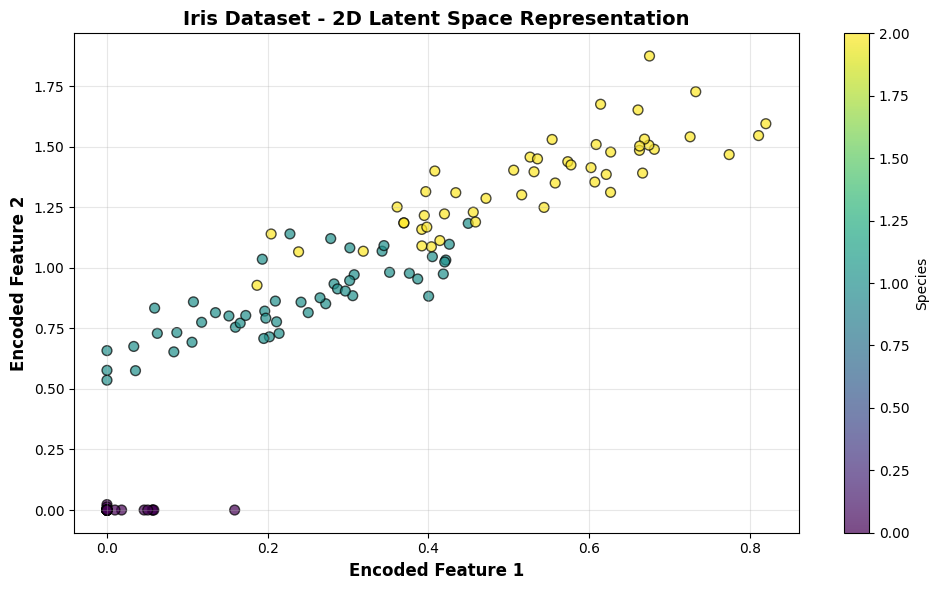

In [11]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(encoded_data[:, 0], encoded_data[:, 1],
                     c=y, cmap='viridis', s=50, alpha=0.7, edgecolors='black')
plt.colorbar(scatter, label='Species')
plt.xlabel('Encoded Feature 1', fontsize=12, fontweight='bold')
plt.ylabel('Encoded Feature 2', fontsize=12, fontweight='bold')
plt.title('Iris Dataset - 2D Latent Space Representation', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Step 8: Visualize Original vs Reconstructed

### Compare Feature-wise

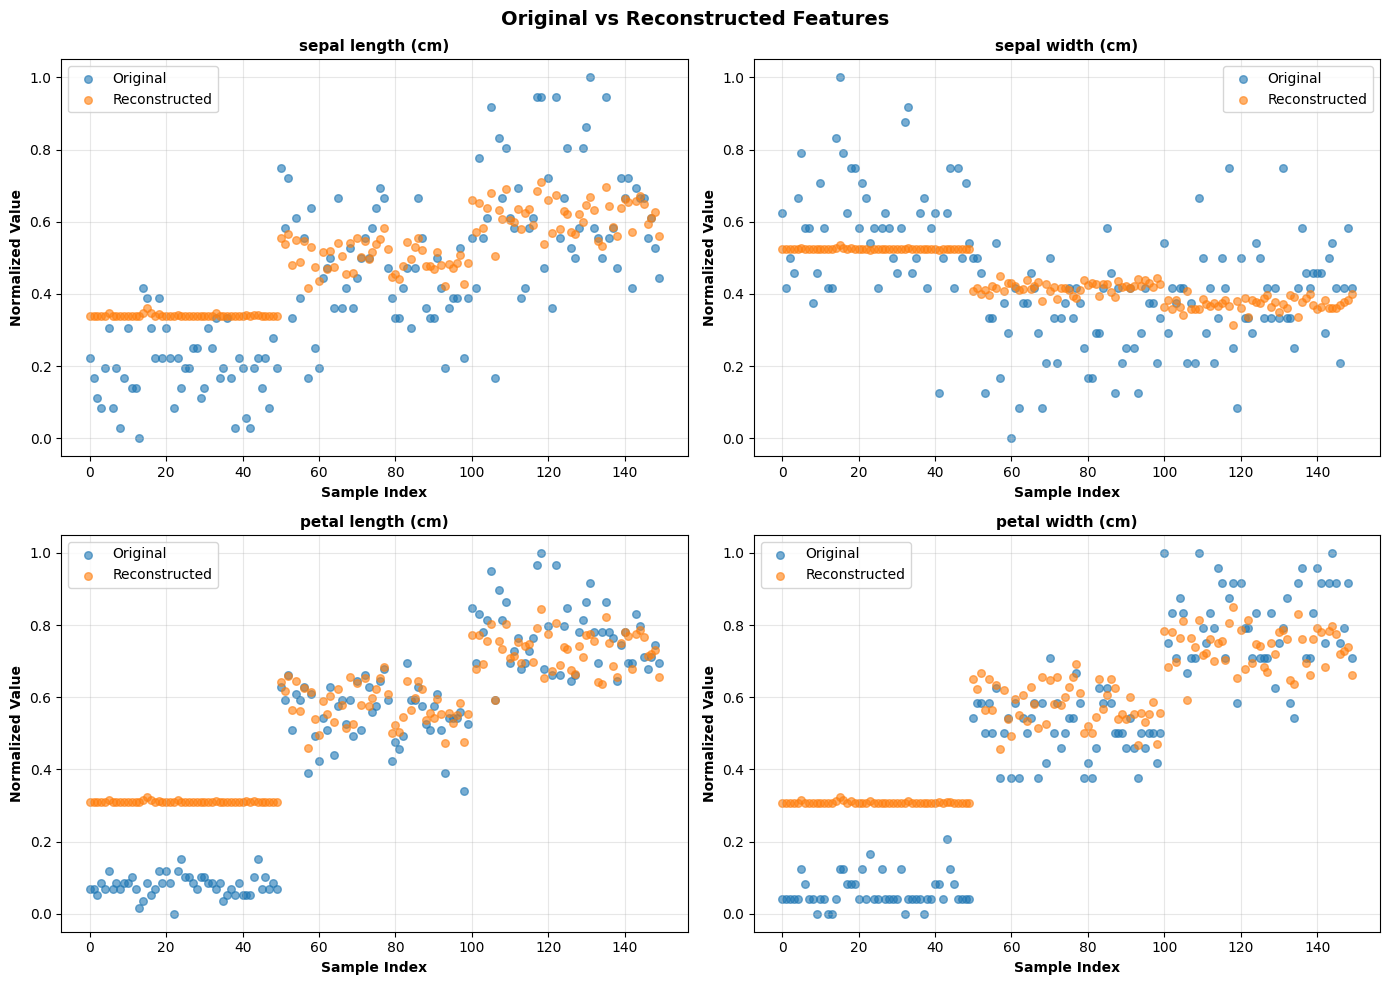

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
feature_names = iris.feature_names

for i, ax in enumerate(axes.flat):
    ax.scatter(range(len(X_norm)), X_norm[:, i],
              label='Original', alpha=0.6, s=30)
    ax.scatter(range(len(decoded_data)), decoded_data[:, i],
              label='Reconstructed', alpha=0.6, s=30)
    ax.set_xlabel('Sample Index', fontsize=10, fontweight='bold')
    ax.set_ylabel('Normalized Value', fontsize=10, fontweight='bold')
    ax.set_title(f'{feature_names[i]}', fontsize=11, fontweight='bold')
    ax.legend()
    ax.grid(alpha=0.3)

plt.suptitle('Original vs Reconstructed Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## Step 9: Calculate Reconstruction Error

### Compute MSE

In [13]:
mse = np.mean((X_norm - decoded_data) ** 2)
print(f"Mean Squared Error (MSE): {mse:.6f}")

# Per-sample reconstruction error
sample_errors = np.mean((X_norm - decoded_data) ** 2, axis=1)
print(f"\nAverage reconstruction error per sample: {np.mean(sample_errors):.6f}")
print(f"Max reconstruction error: {np.max(sample_errors):.6f}")
print(f"Min reconstruction error: {np.min(sample_errors):.6f}")

Mean Squared Error (MSE): 0.023454

Average reconstruction error per sample: 0.023454
Max reconstruction error: 0.089829
Min reconstruction error: 0.000961


### Plot Training Loss

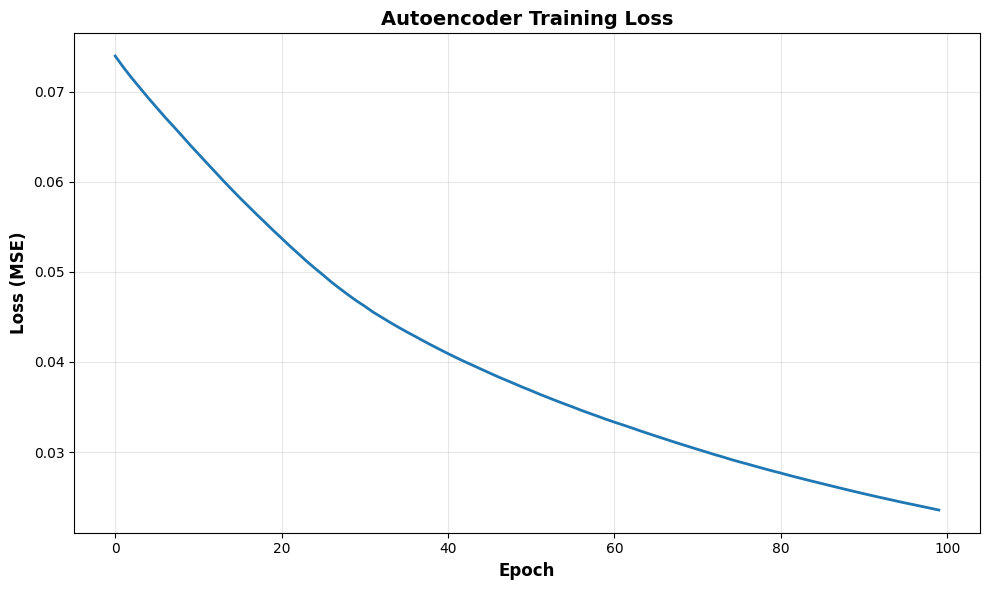

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], linewidth=2)
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Loss (MSE)', fontsize=12, fontweight='bold')
plt.title('Autoencoder Training Loss', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Summary

**Key Results:**
- Original 4D data compressed to 2D latent representation
- Latent space visualization shows species clustering
- Reconstruction maintains original data characteristics
- Low MSE indicates effective encoding/decoding